In [1]:
import pandas as pd
import json
from tqdm.auto import tqdm
import gc
tqdm.pandas()

In [2]:
paths = ['/kaggle/input/twitter-activity-data-users-p1/activity_timelines_1.json',
 '/kaggle/input/twitter-activity-data-users-p2/activity_timelines_2.json',
 '/kaggle/input/twitter-activity-data-users-p3/activity_timelines_3.json',
 '/kaggle/input/twitter-activity-data-users-p4-final/activity_timelines_4.json',
 '/kaggle/input/twitter-activity-data-users-p5/activity_timelines_5.json',
 '/kaggle/input/twitter-activity-data-users-p6/activity_timelines_6.json',
 '/kaggle/input/twitter-activity-data-users-p7/activity_timelines_7.json',
 '/kaggle/input/twitter-activity-data-users-p8/activity_timelines_8.json',
 '/kaggle/input/of-twitter-activity-data-users-p9/activity_timelines_9.json',
 '/kaggle/input/twitter-activity-data-users-p10/activity_timelines_10.json']

In [3]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.7 MB/s eta 0:00:0000:01


In [6]:
activity_data = []
for i in paths:
    activity_data.append(json.load(open(i)))

In [7]:
posts = []
for i in activity_data:
    for j in i:
        for k in j:
            posts.append(k['text'])

In [8]:
from sentence_transformers import SentenceTransformer
model1 = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device = 'cuda') # small and fast
model2 = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2', device = 'cuda') # multilingual
model3 = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device = 'cuda') # large
model4 = SentenceTransformer('jinaai/jina-embeddings-v2-base-en', device = 'cuda') # SOTA

2024-06-15 12:05:27.503354: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 12:05:27.503454: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 12:05:27.634125: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/71.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/275M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at jinaai/jina-embeddings-v2-base-en and are newly initialized: ['embeddings.position_embeddings.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm.weight', 'encoder.layer.0.output.dense.bias', 'encoder.layer.0.output.dense.weight', 'encoder.layer.1.intermediate.dense.bias', 'encoder.layer.1.intermediate.dense.weight', 'encoder.layer.1.output.LayerNorm.bias', 'encoder.layer.1.output.LayerNorm.weight', 'encoder.layer.1.output.dense.bias', 'encoder.layer.1.output.dense.weight', 'encoder.layer.10.intermediate.dense.bias', 'encoder.layer.10.intermediate.dense.weight', 'encoder.layer.10.output.LayerNorm.bias', 'encoder.layer.10.output.LayerNorm.weight', 'encoder.layer.10.output.dense.bias', 'encoder.layer.10.output.dense.weight', 'encoder.layer.11.intermediate.dense.bias', 'encoder.layer.11.intermedi

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
e1 = model1.encode(posts)
e2 = model2.encode(posts)
e3 = model3.encode(posts)
e4 = model4.encode(posts)

Batches:   0%|          | 0/3564 [00:00<?, ?it/s]

Batches:   0%|          | 0/3564 [00:00<?, ?it/s]

Batches:   0%|          | 0/3564 [00:00<?, ?it/s]

Batches:   0%|          | 0/3564 [00:00<?, ?it/s]

In [10]:
import os
os.listdir('/kaggle/input/timedecayfunctions-dynamic-embeddings-analysis')

['1_gaussian_cos_time_dpe.npy',
 '3_gaussian_dpe.npy',
 'distiluse-base-multilingual.npy',
 '1_inv_sqrt_cos_time_dpe.npy',
 '2_gaussian_dpe.npy',
 '4_exp_cos_dpe.npy',
 '3_logarithmic_dpe.npy',
 '1_hyperbolic_dpe.npy',
 '3_gaussian_cos_time_dpe.npy',
 '4_hyperbolic_cos_time_dpe.npy',
 '1_exp_cos_dpe.npy',
 '3_exp_dpe.npy',
 '4_logarithmic_cos_time_dpe.npy',
 '2_inv_sqrt_cos_time_dpe.npy',
 '3_logarithmic_cos_dpe.npy',
 '2_inv_sqrt_cos_dpe.npy',
 '2_hyperbolic_cos_dpe.npy',
 '3_inv_lin_cos_time_dpe.npy',
 '2_gaussian_cos_time_dpe.npy',
 '__results__.html',
 '4_exp_cos_time_dpe.npy',
 '3_hyperbolic_cos_time_dpe.npy',
 '1_inv_lin_cos_dpe.npy',
 '4_logarithmic_cos_dpe.npy',
 '2_inv_lin_dpe.npy',
 '2_gaussian_cos_dpe.npy',
 '4_logarithmic_dpe.npy',
 '1_gaussian_cos_dpe.npy',
 '2_inv_lin_cos_time_dpe.npy',
 'all-mpnet-base-v2.npy',
 '3_hyperbolic_cos_dpe.npy',
 'jina-v2-en.npy',
 '1_hyperbolic_cos_dpe.npy',
 '4_inv_lin_cos_time_dpe.npy',
 'minilml6v2.npy',
 '2_hyperbolic_cos_time_dpe.npy',
 

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Input, Dense, Lambda
import tensorflow.keras.backend as K

def create_model():
    input1 = Input(shape=(512,))
    input2 = Input(shape=(512,))

    dense1 = Dense(256, activation='relu')(input1)
    dense1 = Dense(128, activation='relu')(dense1)
    dense1 = Dense(64, activation='relu')(dense1)

    dense2 = Dense(256, activation='relu')(input2)
    dense2 = Dense(128, activation='relu')(dense2)
    dense2 = Dense(64, activation='relu')(dense2)

    def cosine_similarity(inputs):
        x, y = inputs
        x = K.l2_normalize(x, axis=-1)
        y = K.l2_normalize(y, axis=-1)
        return K.sum(x * y, axis=-1, keepdims=True)

    cos_sim = Lambda(cosine_similarity)([dense1, dense2])

    model = Model(inputs=[input1, input2], outputs=cos_sim)
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model


In [13]:
def train_evaluate(file, e):
    input_1 = np.load(file)
    input_2 = e
    model = create_model()
    model.fit(input_1, input_2,1)
    return K.mean(K.sigmoid(model.predict(input_1, input_2)))

In [17]:
results = {}
for i in os.listdir('/kaggle/input/timedecayfunctions-dynamic-embeddings-analysis'):
    if i.endswith('.npy'):
        print("Pipeline for", i)
    if i.startswith('1'):
        results[i] = train_evaluate(i,e1)
    if i.startswith('2'):
        results[i] = train_evaluate(i,e2)
    if i.startswith('3'):
        results[i] = train_evaluate(i,e3)
    if i.startswith('4'):
        results[i] = train_evaluate(i,e4)

Pipeline for 1_gaussian_cos_time_dpe.npy
Pipeline for 3_gaussian_dpe.npy
Pipeline for distiluse-base-multilingual.npy
Pipeline for 1_inv_sqrt_cos_time_dpe.npy
Pipeline for 2_gaussian_dpe.npy
Pipeline for 4_exp_cos_dpe.npy
Pipeline for 3_logarithmic_dpe.npy
Pipeline for 1_hyperbolic_dpe.npy
Pipeline for 3_gaussian_cos_time_dpe.npy
Pipeline for 4_hyperbolic_cos_time_dpe.npy
Pipeline for 1_exp_cos_dpe.npy
Pipeline for 3_exp_dpe.npy
Pipeline for 4_logarithmic_cos_time_dpe.npy
Pipeline for 2_inv_sqrt_cos_time_dpe.npy
Pipeline for 3_logarithmic_cos_dpe.npy
Pipeline for 2_inv_sqrt_cos_dpe.npy
Pipeline for 2_hyperbolic_cos_dpe.npy
Pipeline for 3_inv_lin_cos_time_dpe.npy
Pipeline for 2_gaussian_cos_time_dpe.npy
Pipeline for 4_exp_cos_time_dpe.npy
Pipeline for 3_hyperbolic_cos_time_dpe.npy
Pipeline for 1_inv_lin_cos_dpe.npy
Pipeline for 4_logarithmic_cos_dpe.npy
Pipeline for 2_inv_lin_dpe.npy
Pipeline for 2_gaussian_cos_dpe.npy
Pipeline for 4_logarithmic_dpe.npy
Pipeline for 1_gaussian_cos_dpe.n

In [ ]:
results_df = []
for i in results:
    results_df[pd.Series(i.split('_'))] = results[i]


In [ ]:
df1 = results_df[0]
df2 = results_df[1]
df3 = results_df[2]
df4 = results_df[3]

## MiniLM Evaluation for Accurate Activity Recommendation

In [21]:
df1

,basic,cos,cos_time
gaussian,0.684799,0.758124,0.854276
inv_sqrt,0.681950,0.733301,0.835079
logarithmic,0.650677,0.719356,0.831182
exp,0.601358,0.673760,0.777315
inv_lin,0.424232,0.474385,0.616621
hyperbolic,0.366394,0.433326,0.555031


## DistilUse Multilingual Evaluation for Accurate Activity Recommendation

In [22]:
df2

,basic,cos,cos_time
gaussian,0.768862,0.826680,0.933938
inv_sqrt,0.737953,0.788345,0.936106
logarithmic,0.687051,0.767229,0.843845
exp,0.673745,0.734020,0.836165
inv_lin,0.543239,0.634266,0.715388
hyperbolic,0.522032,0.575382,0.721971


## MPNET Evaluation for Accurate Activity Recommendation

In [23]:
df3

,basic,cos,cos_time
gaussian,0.631093,0.726407,0.811347
inv_sqrt,0.600583,0.692652,0.777927
logarithmic,0.592280,0.653591,0.775865
exp,0.587857,0.645904,0.769279
inv_lin,0.582079,0.663415,0.767864
hyperbolic,0.571216,0.636290,0.724740


## JINA Evaluation for Accurate Activity Recommendation

In [27]:
df4

,basic,cos,cos_time
gaussian,0.899110,0.960034,1.000000
inv_sqrt,0.827555,0.903512,1.000000
logarithmic,0.771490,0.856169,0.965639
exp,0.770413,0.866156,0.927258
inv_lin,0.721708,0.805891,0.905271
hyperbolic,0.642350,0.711610,0.819516


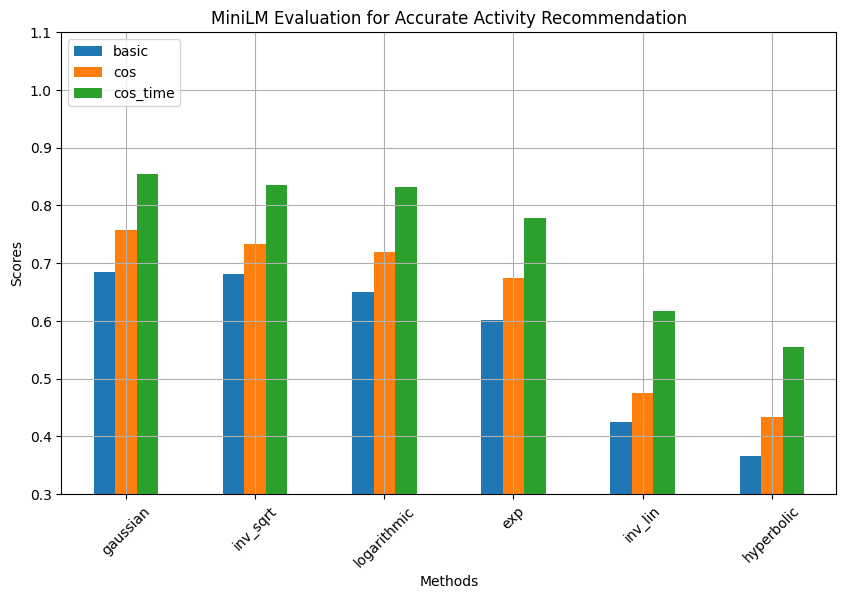

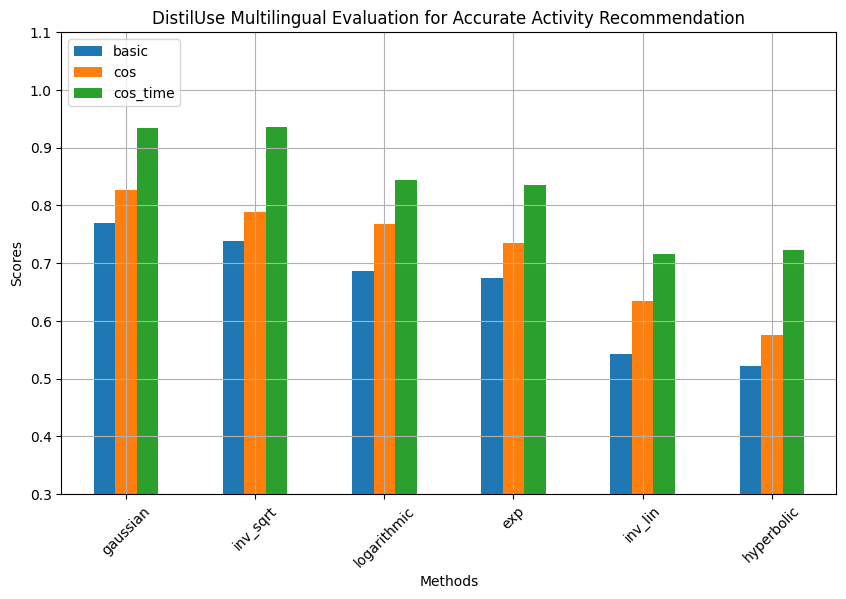

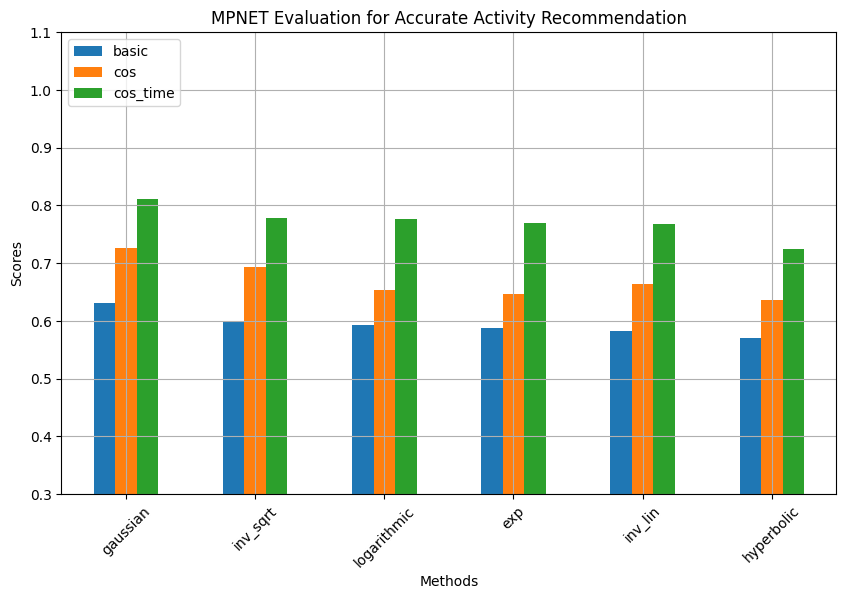

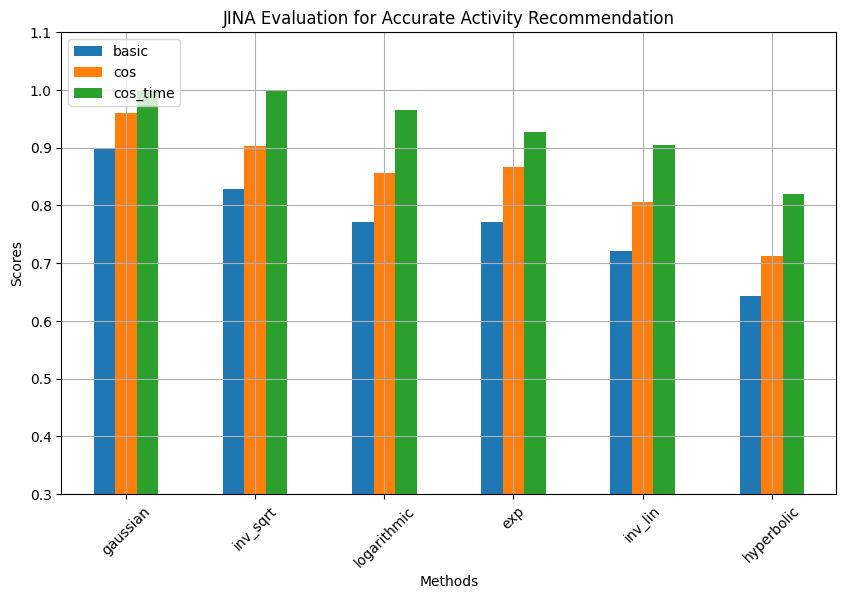

In [30]:
import matplotlib.pyplot as plt
def plot_data(df, title):
    df.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Methods')
    plt.ylabel('Scores')
    plt.xticks(rotation=45)
    plt.ylim(0.3, 1.1)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Plotting each dataframe
plot_data(df1, "MiniLM Evaluation for Accurate Activity Recommendation")
plot_data(df2, "DistilUse Multilingual Evaluation for Accurate Activity Recommendation")
plot_data(df3, "MPNET Evaluation for Accurate Activity Recommendation")
plot_data(df4, "JINA Evaluation for Accurate Activity Recommendation")

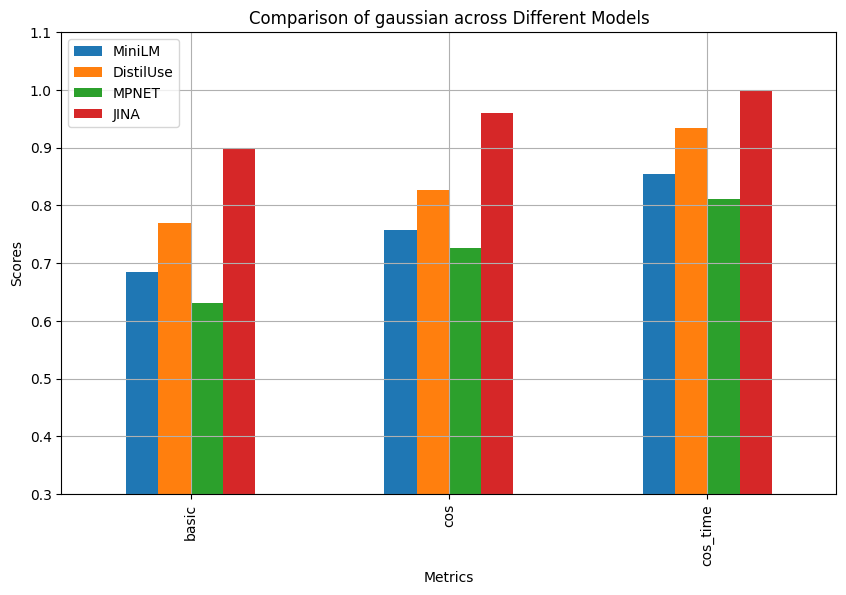

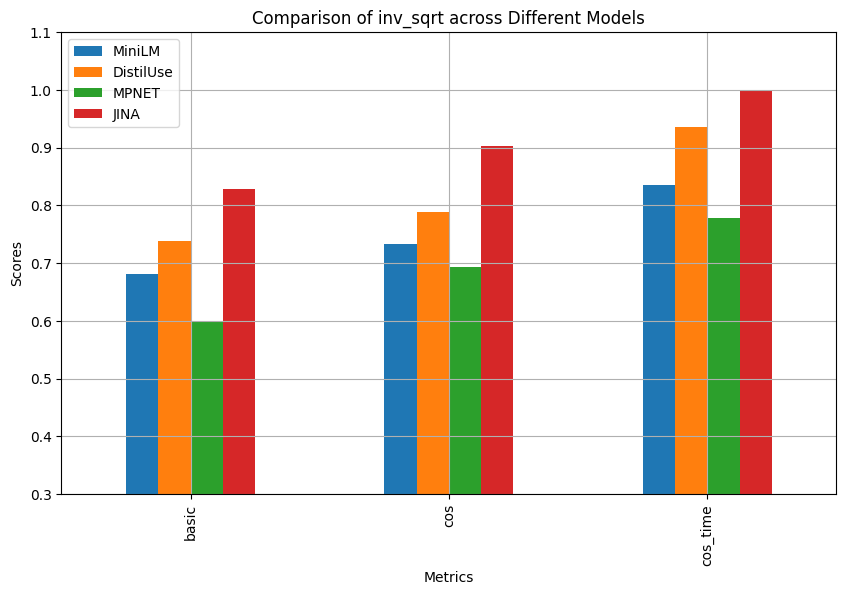

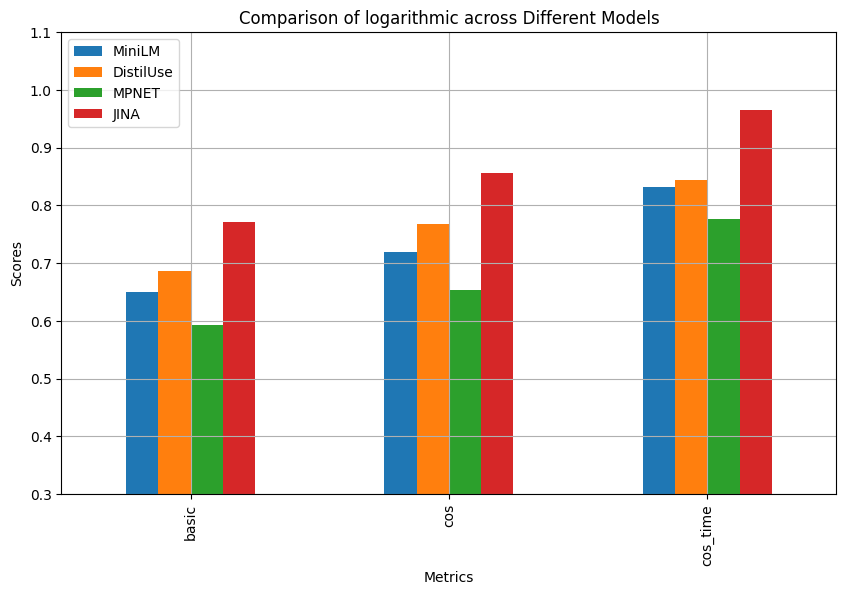

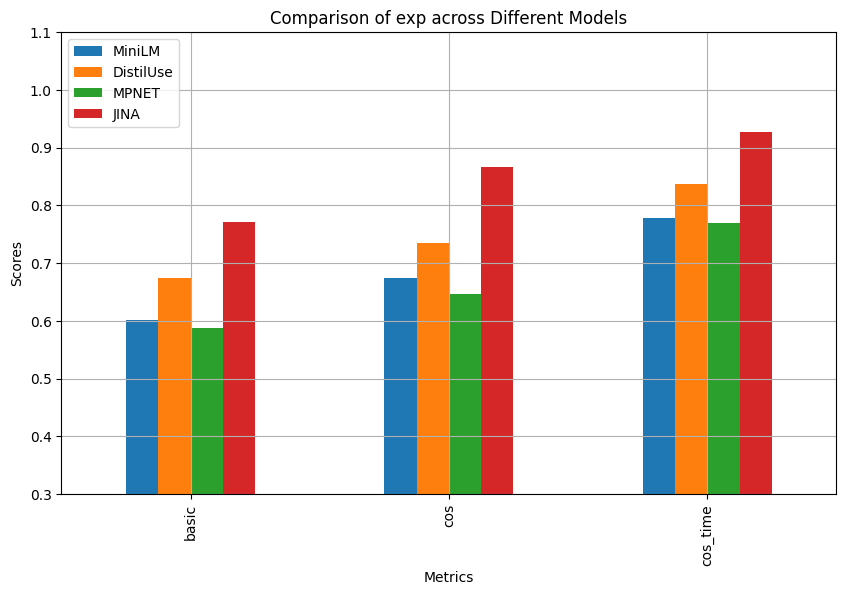

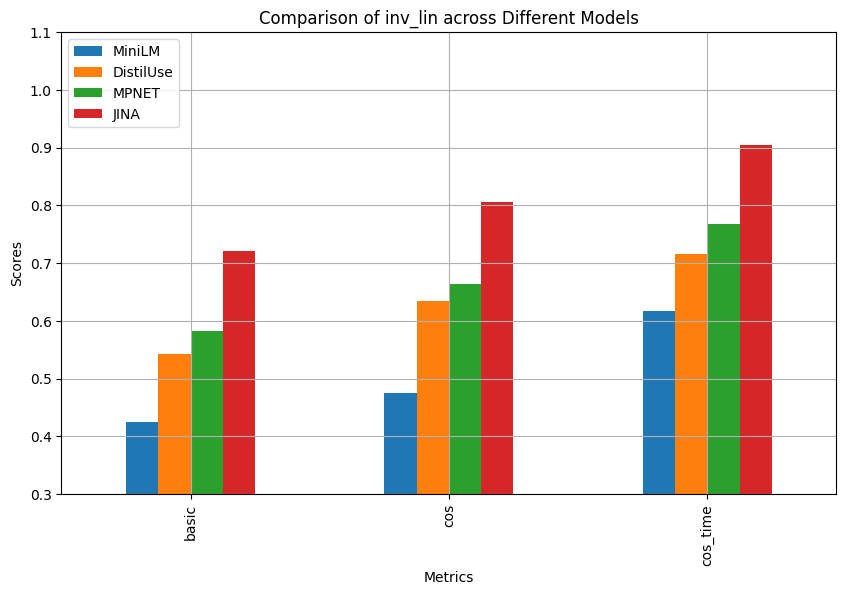

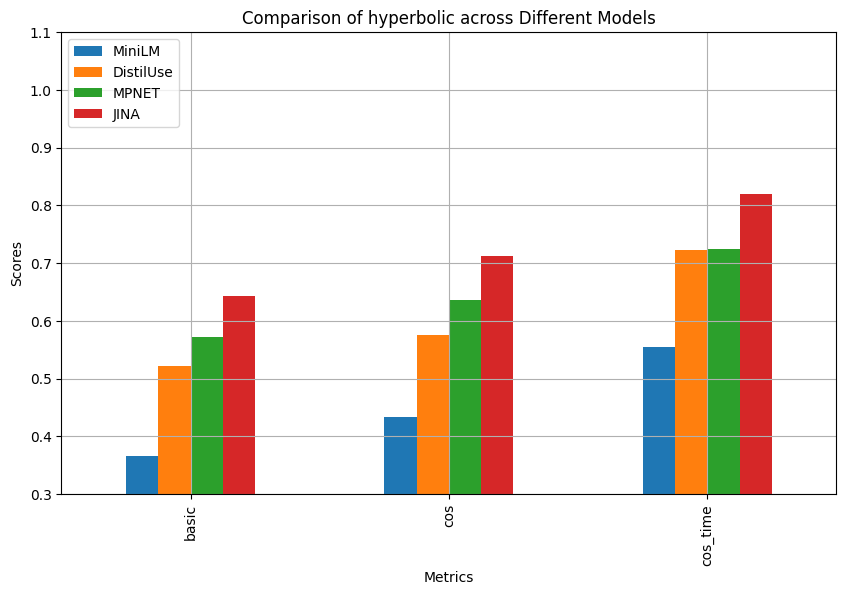

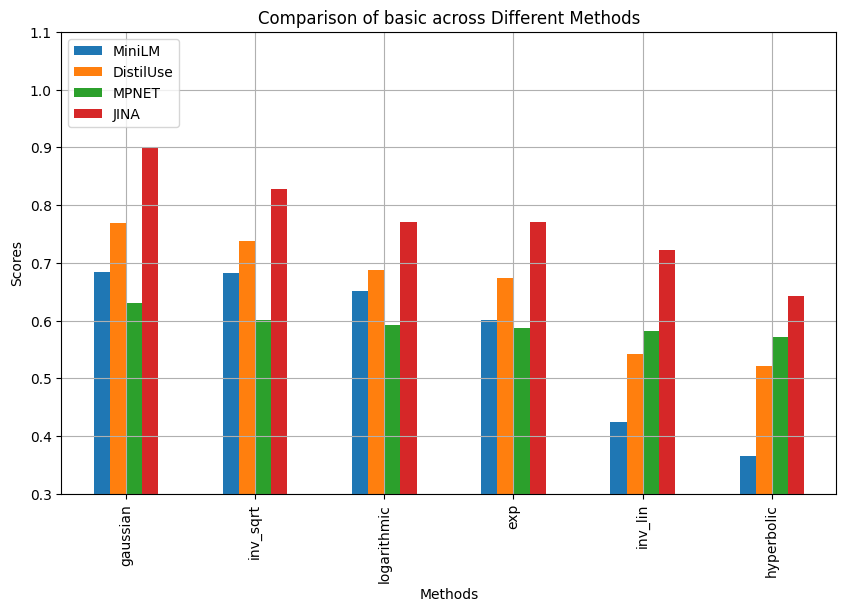

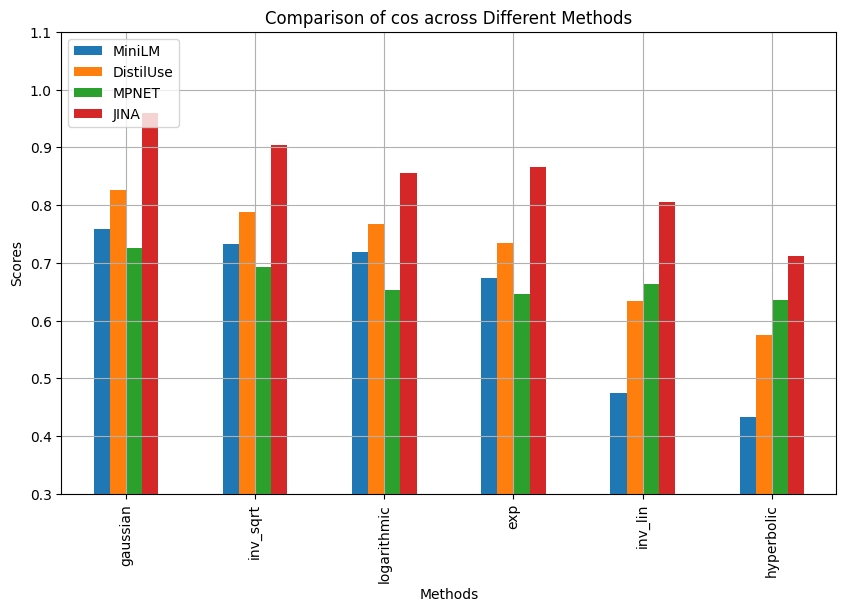

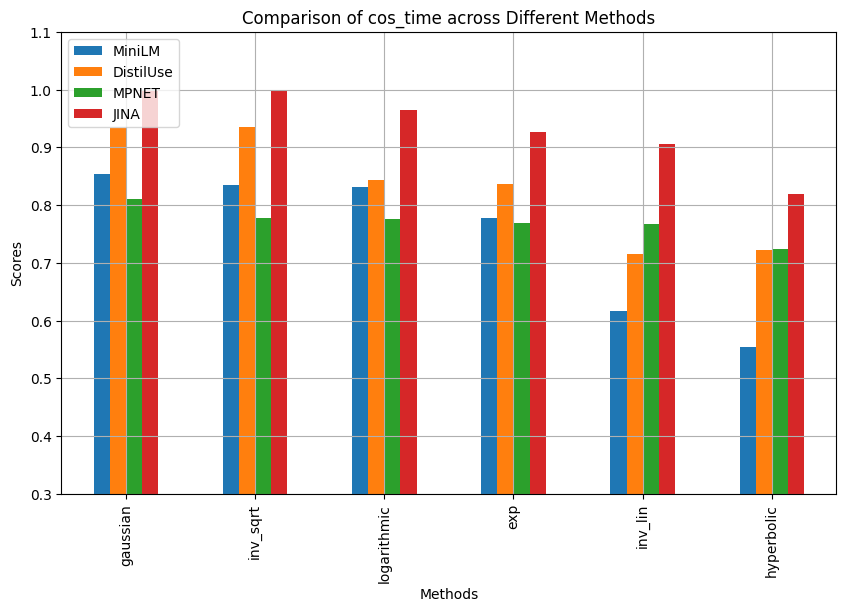

In [31]:
def plot_comparison_methods(df1, df2, df3, df4, method):
    values = {
        'MiniLM': df1.loc[method].values,
        'DistilUse': df2.loc[method].values,
        'MPNET': df3.loc[method].values,
        'JINA': df4.loc[method].values
    }
    df = pd.DataFrame(values, index=['basic', 'cos', 'cos_time'])
    df.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Comparison of {method} across Different Models")
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.ylim(0.3, 1.1)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Function to plot comparison of formulas
def plot_comparison_formulas(df1, df2, df3, df4, formula):
    values = {
        'MiniLM': df1[formula].values,
        'DistilUse': df2[formula].values,
        'MPNET': df3[formula].values,
        'JINA': df4[formula].values
    }
    index = df1.index.tolist()
    df = pd.DataFrame(values, index=index)
    df.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Comparison of {formula} across Different Methods")
    plt.xlabel('Methods')
    plt.ylabel('Scores')
    plt.ylim(0.3, 1.1)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Plotting comparison for each method
methods = ['gaussian', 'inv_sqrt', 'logarithmic', 'exp', 'inv_lin', 'hyperbolic']
for method in methods:
    plot_comparison_methods(df1, df2, df3, df4, method)

# Plotting comparison for each formula
formulas = ['basic', 'cos', 'cos_time']
for formula in formulas:
    plot_comparison_formulas(df1, df2, df3, df4, formula)

JINA performs the best for recommending accurately. it is able to match the profile embeddings to the post embeddings correctly.

models: jina>multilingual>mpnet>minilm

methods: guassian>inv_sqrt>log>exp>inv_lin>hyp

metrics: cos_time>cos>>basic